In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [2]:
import numpy as np
from sklearn import cluster, datasets, mixture

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

In [4]:
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)


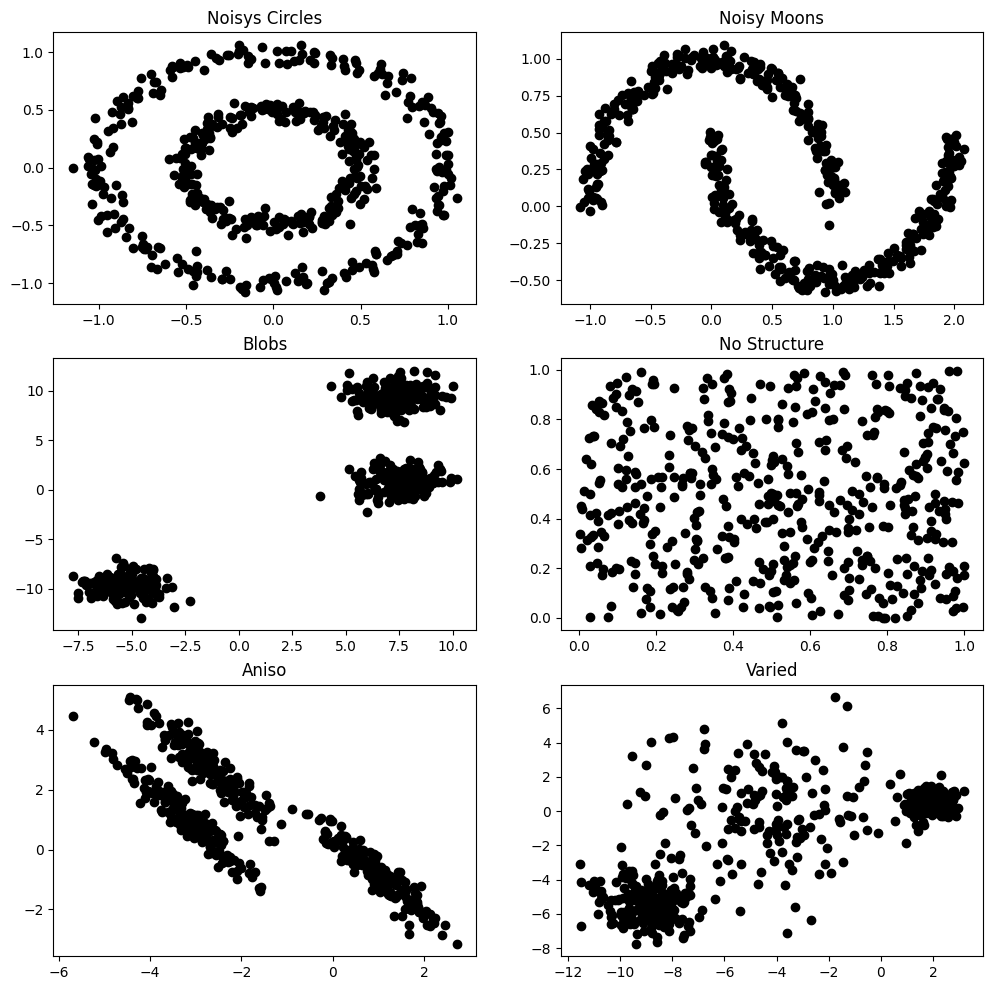

In [27]:
# Create figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
    
datasets = [noisy_circles,noisy_moons,blobs,no_structure,aniso,varied]
names = ['Noisy Circles', 'Noisy Moons','Blobs','No Structure','Aniso','Varied']

for dataset,ax,name in zip(datasets,axes,names):     
    ax.scatter(dataset[0][:,0], dataset[0][:,1],c='black')
    ax.set_title(name)for dataset,ax,name in zip(datasets,axes,names):    

### K-means

/home/alexa/Jupyter/notebookenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexa/Jupyter/notebookenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexa/Jupyter/notebookenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexa/Jupyter/notebookenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

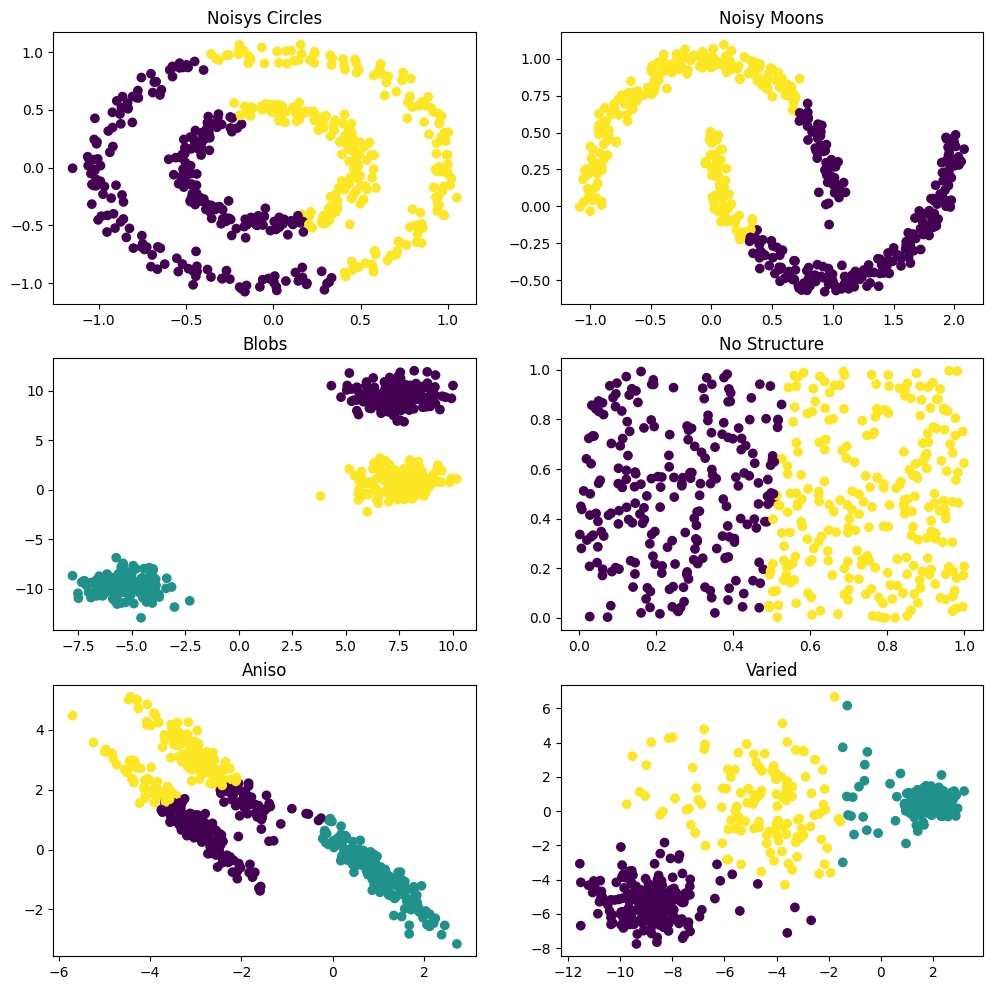

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

n_clusters_arr = [2,2,3,2,3,3]
    
for dataset,ax,name,n_clusters in zip(datasets,axes,names,n_clusters_arr):     
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit_predict(dataset[0])    
    ax.scatter(dataset[0][:,0], dataset[0][:,1], c=kmeans.labels_)
    ax.set_title(name);

### Kmedoids

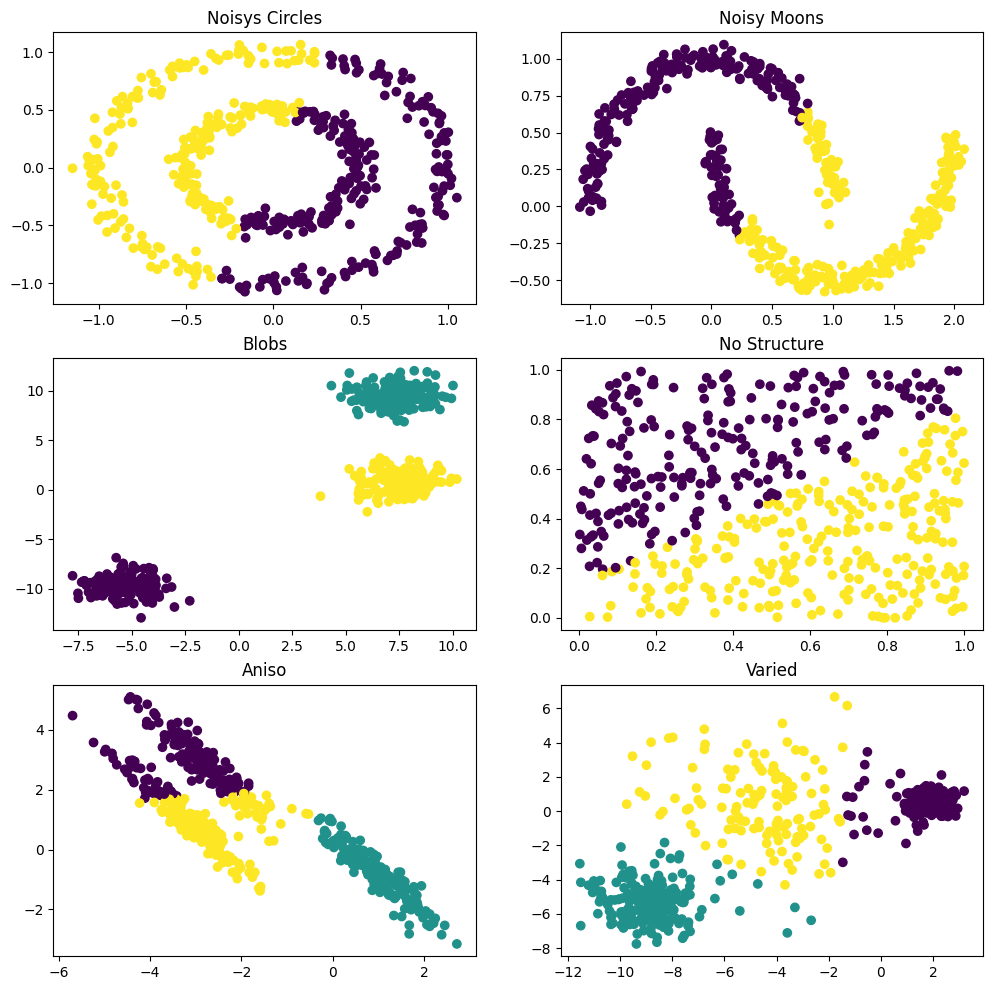

In [83]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
    
for dataset,ax,name,n_clusters in zip(datasets,axes,names,n_clusters_arr):   
    kmedoids = KMedoids(n_clusters=n_clusters)
    kmedoids.fit_predict(dataset[0])  
    ax.scatter(dataset[0][:,0], dataset[0][:,1], c=kmedoids.labels_)
    ax.set_title(name)
    

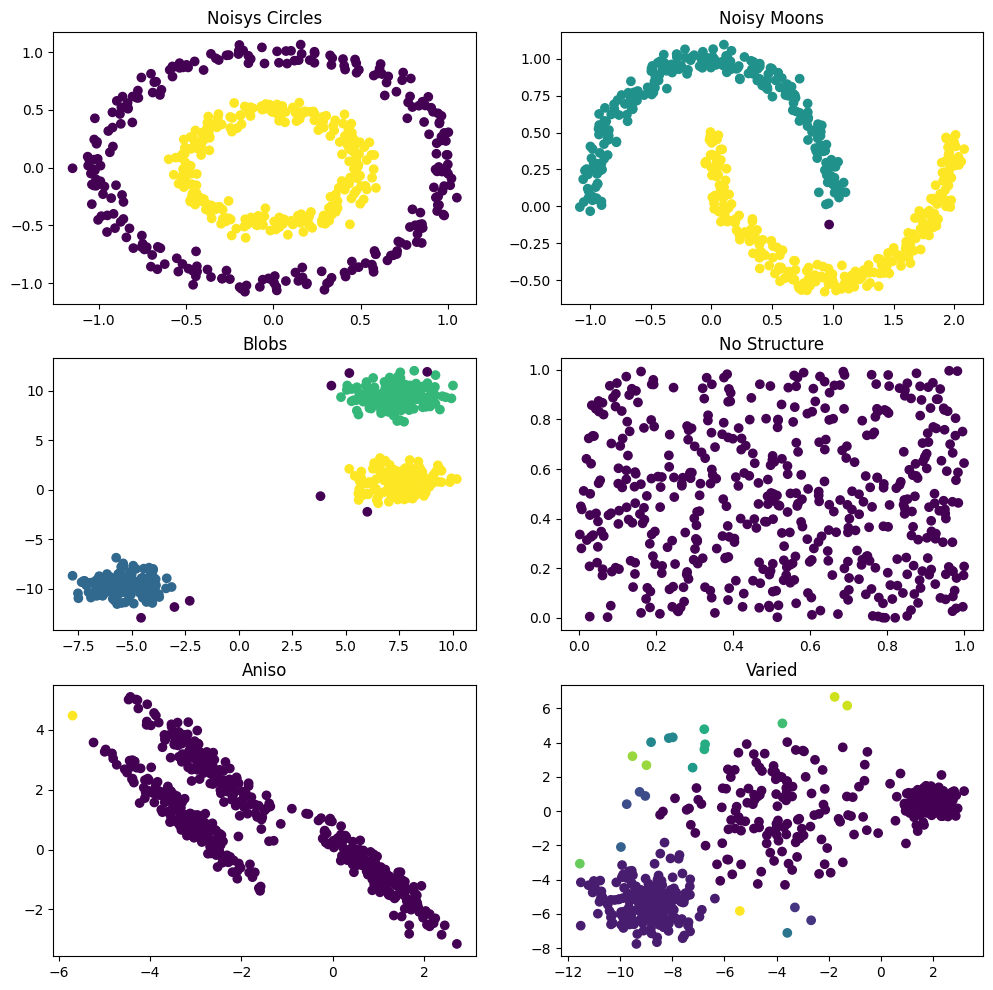

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

eps_arr = [0.25,0.25,1,1,1,1]
min_sam_arr = [30,30,10,1,1,1]
    
for dataset,ax,name,eps,min_sam in zip(datasets,axes,names,eps_arr,min_sam_arr):     
    dbscan = DBSCAN(eps=eps, min_samples=min_sam)
    dbscan.fit_predict(dataset[0])  
    ax.scatter(dataset[0][:,0], dataset[0][:,1], c=dbscan.labels_)
    ax.set_title(name)
    

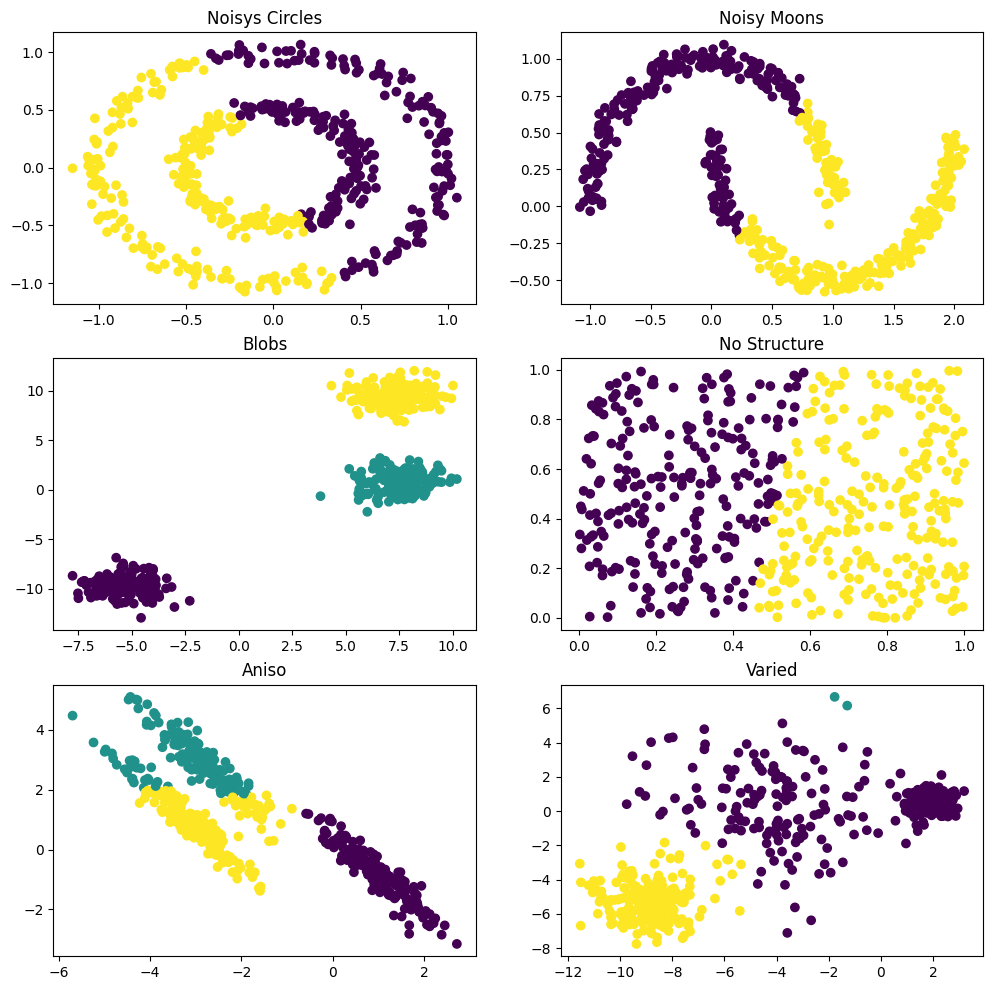

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
    
for dataset,ax,name,n_clusters in zip(datasets,axes,names,n_clusters_arr):     
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit_predict(dataset[0])  
    ax.scatter(dataset[0][:,0], dataset[0][:,1], c=sc.labels_)
    ax.set_title(name)
